In [48]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
# Load Dataset
tweets_df = pd.read_csv('twitter.csv')
print(tweets_df.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [50]:
#Data preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[@#]\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the cleaning function to the 'tweet' column
tweets_df['tweet'] = tweets_df['tweet'].apply(clean_text)
print(tweets_df.head())

   id  label                                              tweet
0   1      0  father dysfunctional selfish drags kids dysfun...
1   2      0  thanks credit cant use cause dont offer wheelc...
2   3      0                                     bihday majesty
3   4      0                              love u take u time ur
4   5      0                                 factsguide society


In [51]:
# Display basic statistical summary
print(tweets_df.describe())

                 id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000


In [52]:
# Display content of each column
print(tweets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


In [53]:
# Remove the 'id' column and display the DataFrame
tweets_df = tweets_df.drop(columns=['id'])
print(tweets_df.head())

   label                                              tweet
0      0  father dysfunctional selfish drags kids dysfun...
1      0  thanks credit cant use cause dont offer wheelc...
2      0                                     bihday majesty
3      0                              love u take u time ur
4      0                                 factsguide society


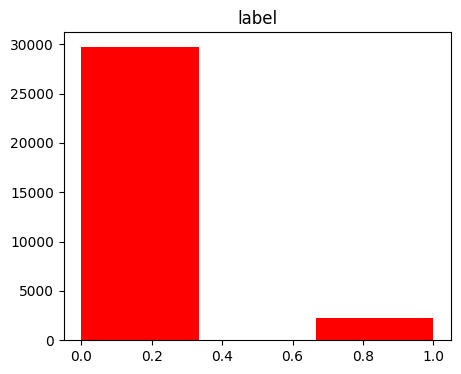

In [54]:
# Visualization of label distribution
# Using hist()
tweets_df.hist(bins=3, column=["label"], figsize=(5,4), color='r', grid=False)
plt.show()

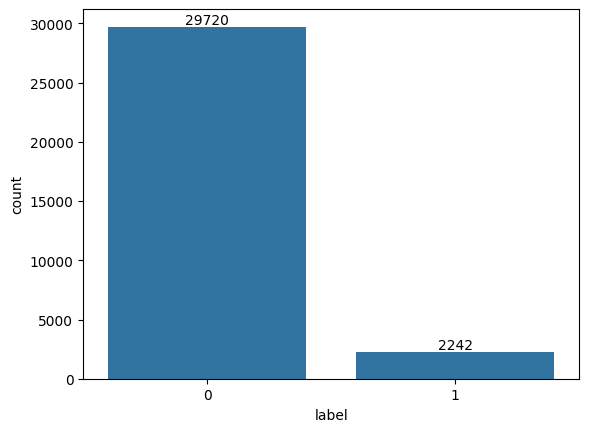

In [55]:
# Visualization of label distribution
# Using Seaborn for count plot
ax = sns.countplot(data=tweets_df, x='label')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

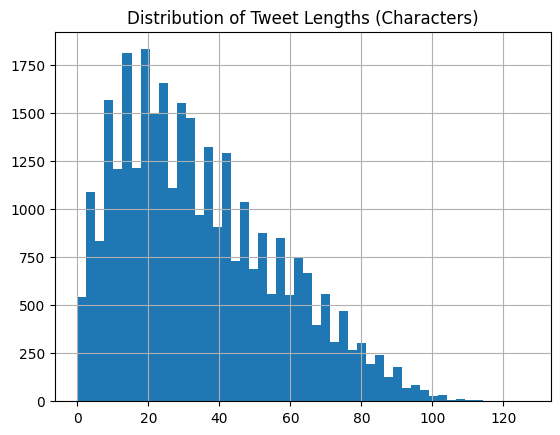

In [56]:
# Visualize the distribution of tweet lengths (characters)
tweets_df['length_char'] = tweets_df['tweet'].apply(len)
tweets_df['length_char'].hist(bins=50)
plt.title('Distribution of Tweet Lengths (Characters)')
plt.show()

In [57]:
# 14. Create DataFrame for positive tweets
positive_df = tweets_df[tweets_df['label'] == 0]
# 15. Create DataFrame for negative tweets
negative_df = tweets_df[tweets_df['label'] == 1]

In [ ]:
# install of WordCloud module
!pip install wordcloud

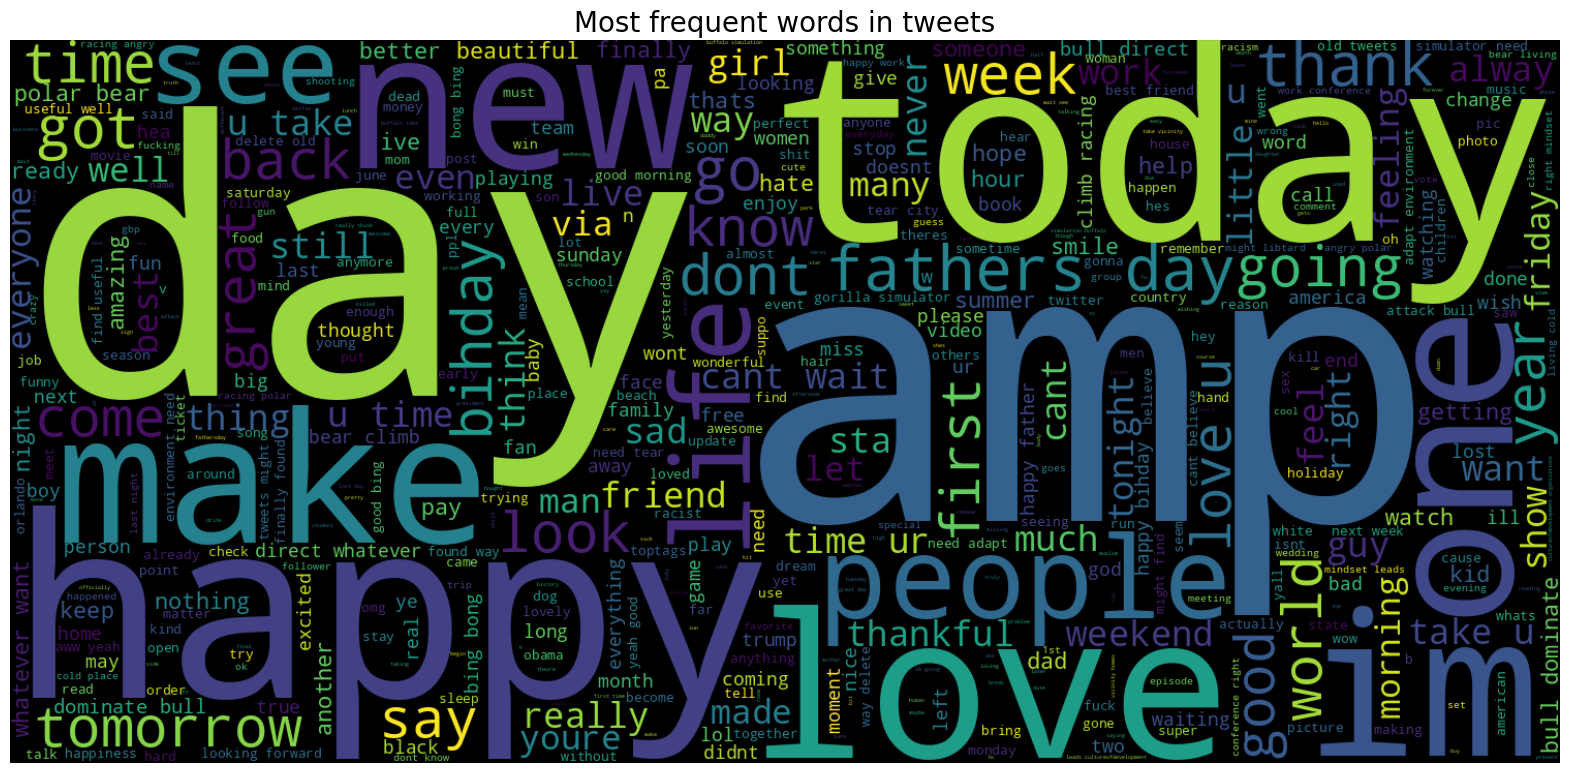

In [58]:
# WordCloud for all tweets
sentences = ' '.join(tweets_df['tweet'].tolist())
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=700).generate(sentences)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in tweets', fontsize=20)
plt.show()

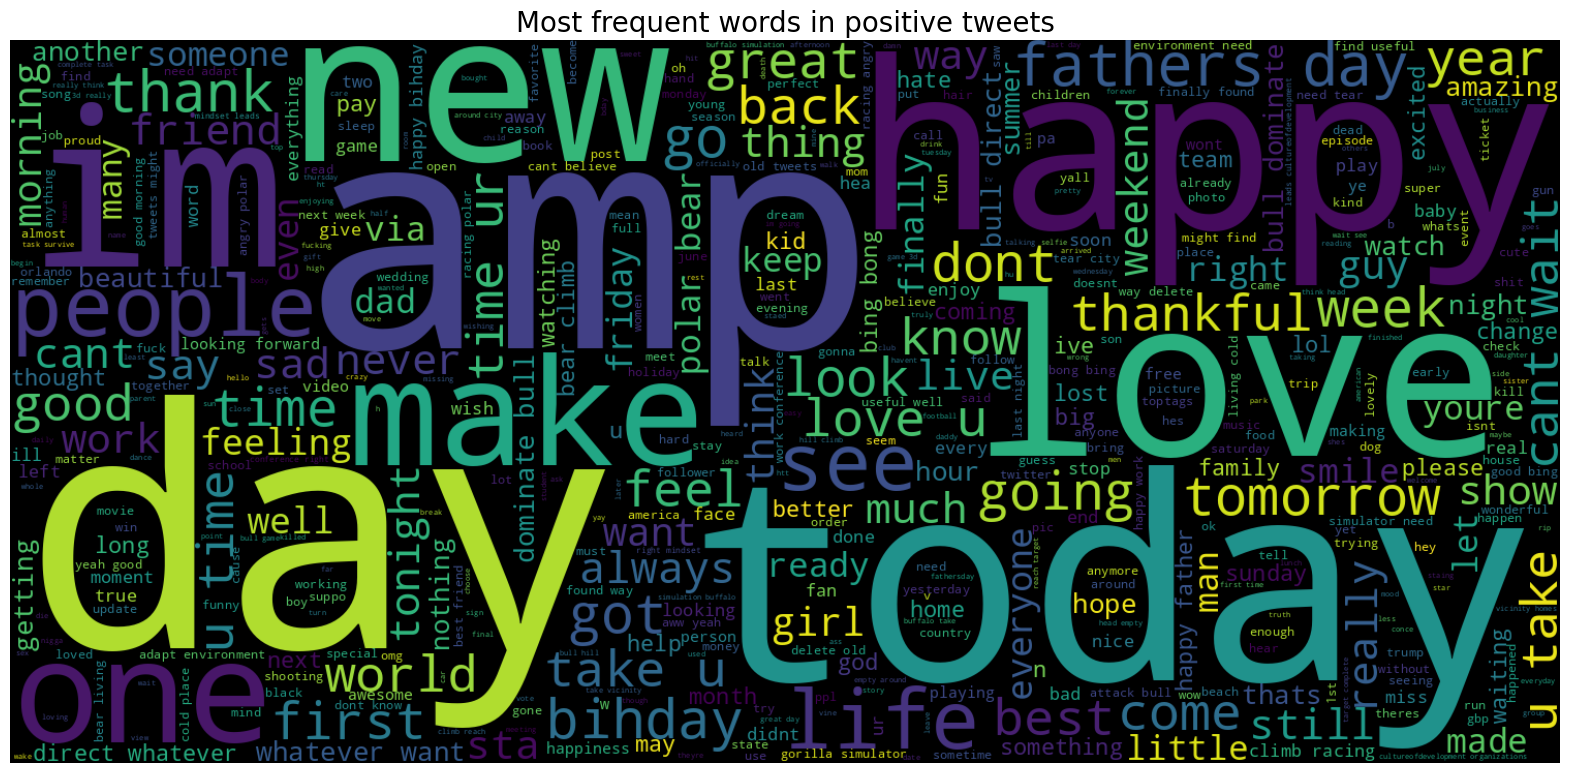

In [59]:
# Positive WordCloud
positive_sentences = ' '.join(positive_df['tweet'].tolist())
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=700).generate(positive_sentences)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=20)
plt.show()

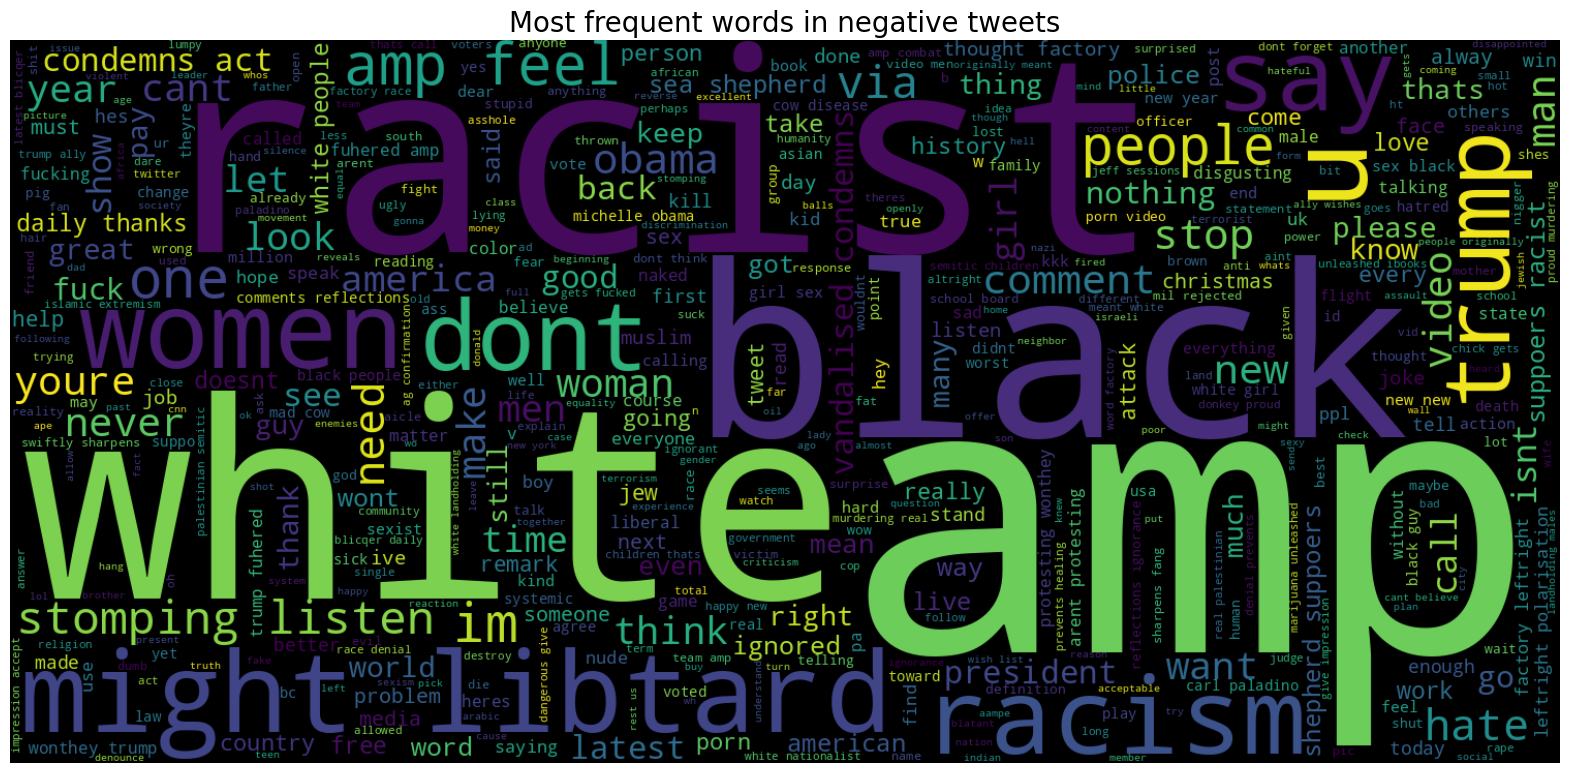

In [60]:
# Negative WordCloud
negative_sentences = ' '.join(negative_df['tweet'].tolist())
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=700).generate(negative_sentences)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=20)
plt.show()